In [1]:
# Decision Tree
import numpy as np # linear algebra
import pandas as pd # data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('drycleaningrequired.csv')
data.head(5)

,User ID,Gender,Age,EstimatedSalary,DryCleaningReq
0,1,Male,19,19000,0
1,2,Male,35,20000,0
2,3,Female,26,43000,0
3,4,Female,27,57000,0
4,5,Male,19,76000,0


In [3]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
DryCleaningReq     0
dtype: int64

In [6]:
# One Encoding 
isMale = pd.get_dummies(data.Gender)
data['Gender'] = isMale['Male']
data.sample(5)
# 0 - Male
# 1 - Female

,User ID,Gender,Age,EstimatedSalary,DryCleaningReq
56,57,0,23,48000,0
21,22,0,47,49000,1
64,65,0,59,83000,0
18,19,1,46,28000,1
96,97,0,35,25000,0


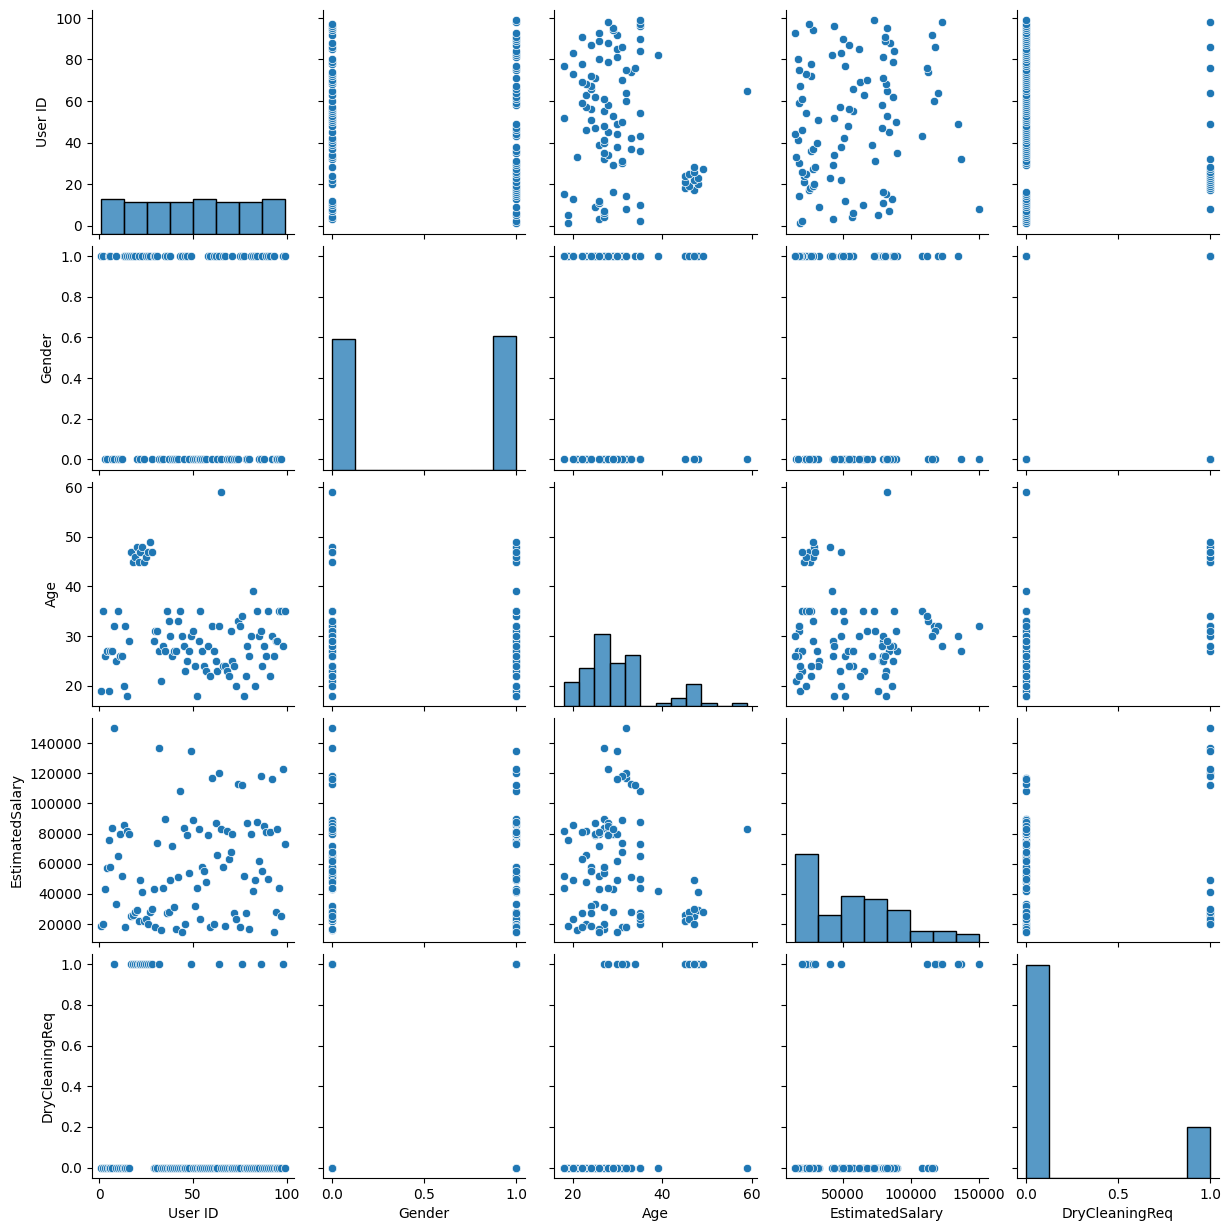

In [8]:
sns.pairplot(data)
plt.show()

Statistical Analysis

In [13]:
data.describe()

,User ID,Gender,Age,EstimatedSalary,DryCleaningReq
count,99.000000,99.000000,99.000000,99.000000,99.000000
mean,50.000000,0.505051,30.282828,57616.161616,0.191919
std,28.722813,0.502519,8.230159,33344.126268,0.395814
min,1.000000,0.000000,18.000000,15000.000000,0.000000
25%,25.500000,0.000000,25.000000,27000.000000,0.000000
50%,50.000000,1.000000,28.000000,52000.000000,0.000000
75%,74.500000,1.000000,33.500000,81500.000000,0.000000
max,99.000000,1.000000,59.000000,150000.000000,1.000000


In [14]:
#skewness of our features
data['Age'].skew()

1.1181546617613143

In [15]:
data['EstimatedSalary'].skew()

0.6203711514635742

In [16]:
data['DryCleaningReq'].skew()

1.588791625208748

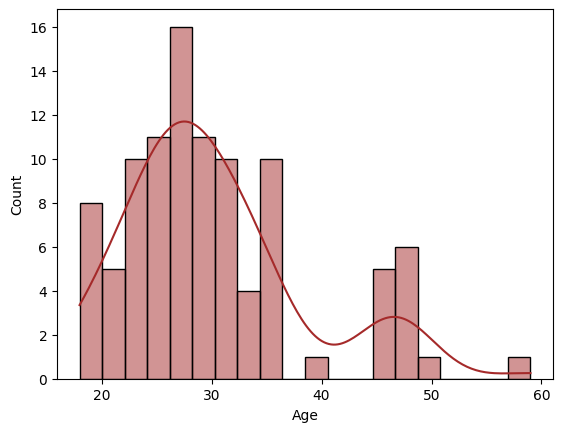

In [18]:
sns.histplot(data['Age'],kde=True,color='brown',bins=20)
plt.show()

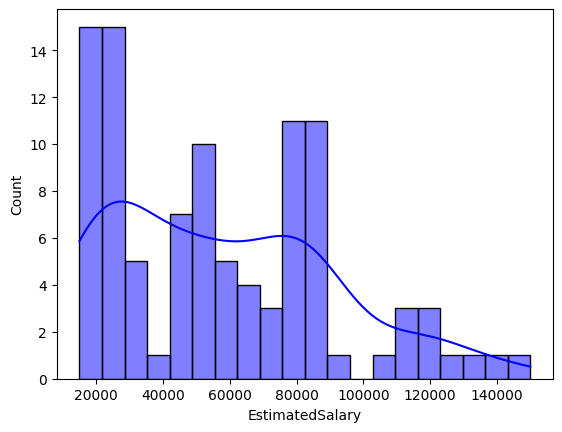

In [20]:
sns.histplot(data['EstimatedSalary'],kde=True,color='blue',bins=20)
plt.show()

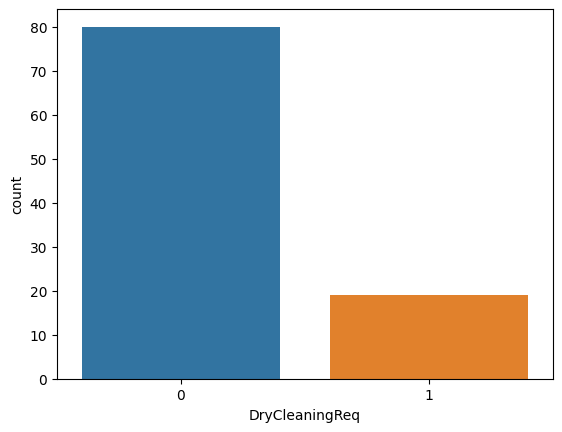

In [22]:
# Lets check the Target Variable

sns.countplot(x='DryCleaningReq', data = data)
plt.show()
# 0 -Yes
# 1 - No

In [23]:
data['DryCleaningReq'].value_counts()

0    80
1    19
Name: DryCleaningReq, dtype: int64

In [24]:
ratio_of_service_req = 80/99
ratio_of_service_req
# approx 80.8% people are willing to have a new online dry cleaning business

0.8080808080808081

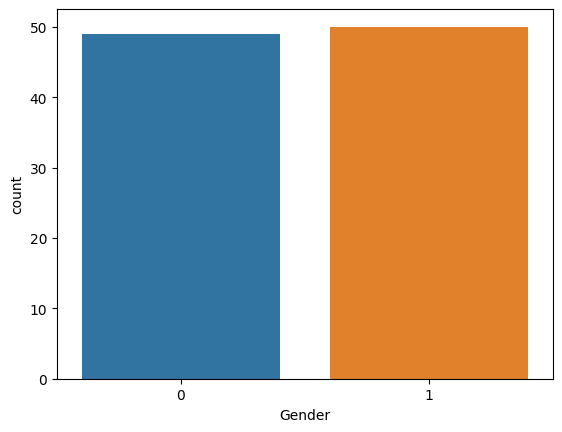

In [25]:
# Lets check the gender ratio in our dataset
sns.countplot(x='Gender', data= data)
plt.show()

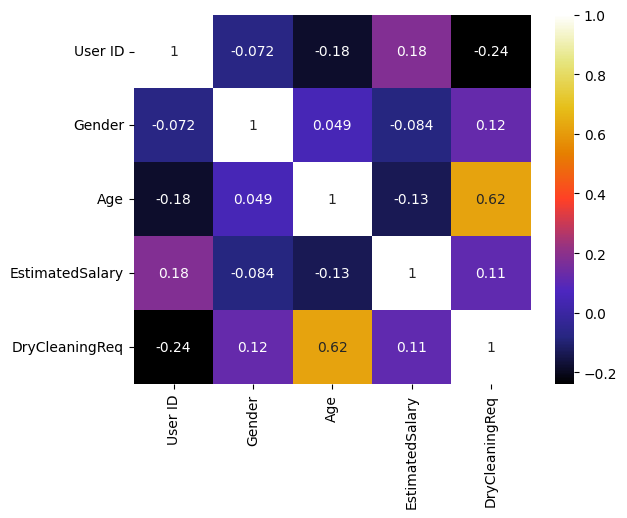

In [31]:
sns.heatmap(data.corr(), annot = True, cmap = 'CMRmap' )
plt.show()
# from below Age is corelated with DryCleaningReq

<Figure size 1000x300 with 0 Axes>

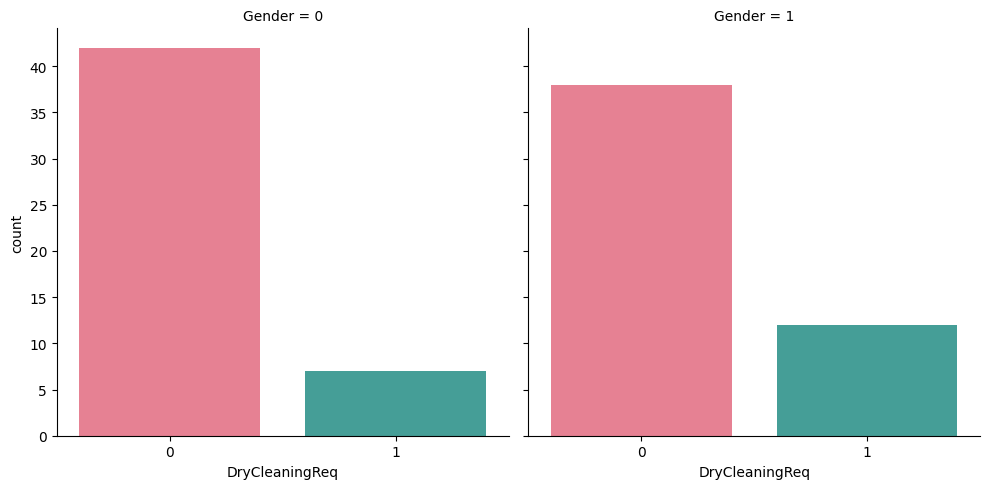

In [28]:
plt.figure(figsize=(10, 3))
sns.catplot(x='DryCleaningReq', col='Gender', kind='count', data=data,palette="husl");
plt.show()
# gender = 0 = female
# gender = 1 = male
# from the below females use dry cleaning services more than males

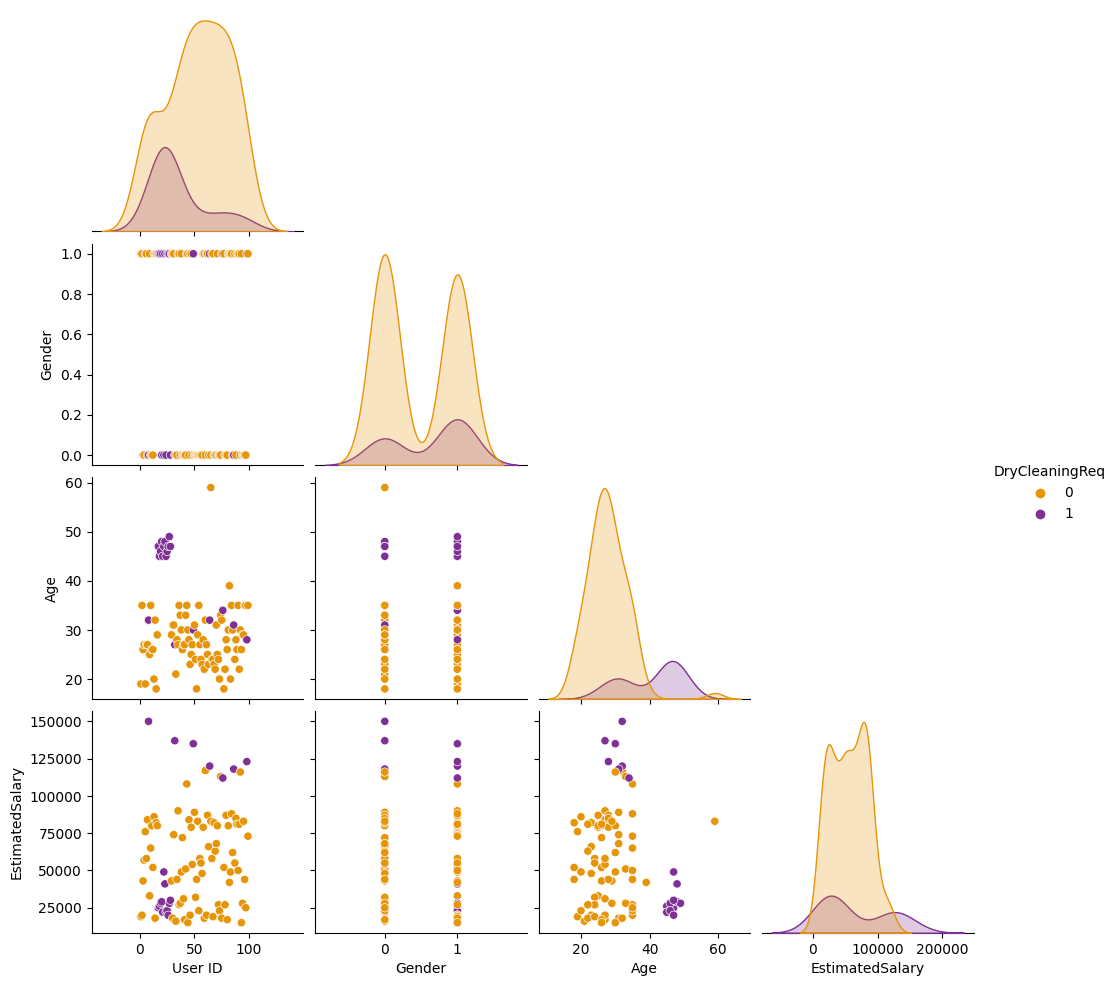

In [30]:
sns.pairplot(data , hue = 'DryCleaningReq',palette='CMRmap_r',corner=True )
plt.show()

Decision Tree for dry cleaning requirement

In [9]:
X, y = data.drop(['User ID', 'DryCleaningReq'], axis = 1), data['DryCleaningReq']

In [10]:
from sklearn.model_selection import train_test_split as splitdata
X_train, X_test, y_train, y_test = splitdata(X, y, test_size = .2, random_state = 62)

In [11]:
from sklearn.tree import DecisionTreeClassifier as DTC
dtc = DTC()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)
# Model Accuracy = 0.8 or 80%

0.8